In [1]:
import chardet 
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [60]:
X = pd.read_csv('train.csv')
y = df_raw['Survived']

## Baseline


In [59]:
def customVectorizer(df, toRemove):
# leEmbarked.fit(df_raw['Embarked'])
    leSex = preprocessing.LabelEncoder()
    leEmbarked = preprocessing.LabelEncoder()
    df.fillna(inplace=True, value=0)
    leSex.fit(df['Sex'])
#     leEmbarked.fit(df['Embarked'])
#     df['Embarked'] = leEmbarked.transform(df['Embarked'])
    df['Sex'] = leSex.transform(df['Sex'])
    return df.drop(labels=toRemove, axis=1)

In [19]:
X = customVectorizer(X, ['Embarked', 'PassengerId', 'Name', 'Age', 'Ticket', 'Cabin'])
print(X.shape)

(891, 5)


In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)


from sklearn.model_selection import cross_val_score

lr_model = LogisticRegression()
cv_scores = cross_val_score(lr_model, X=X, y=y, cv=5, n_jobs=4)
print(cv_scores)

[0.80446927 0.80446927 0.78089888 0.76404494 0.8079096 ]


In [21]:
model.fit(X,y)

/home/bhishma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
df_raw_test = pd.read_csv('test.csv')
df_test = baselineVectorizer(df_raw_test)
y_test_predicted = model.predict(df_test)

In [28]:
print('\n'.join(["{},{}".format(892 + i, y_test_predicted[i]) for i in range(len(y_test_predicted))]) , file=open('test_pred.csv', 'w'))

In [38]:
import matplotlib.pyplot as plt

(array([30., 14., 10., 14.,  3., 29., 39., 65., 73., 42., 65., 62., 33.,
        47., 38., 21., 28., 21., 16., 14., 15.,  7.,  9.,  8.,  4.,  0.,
         5.,  1.,  0.,  1.]),
 array([ 0.42      ,  3.07266667,  5.72533333,  8.378     , 11.03066667,
        13.68333333, 16.336     , 18.98866667, 21.64133333, 24.294     ,
        26.94666667, 29.59933333, 32.252     , 34.90466667, 37.55733333,
        40.21      , 42.86266667, 45.51533333, 48.168     , 50.82066667,
        53.47333333, 56.126     , 58.77866667, 61.43133333, 64.084     ,
        66.73666667, 69.38933333, 72.042     , 74.69466667, 77.34733333,
        80.        ]),
 <a list of 30 Patch objects>)

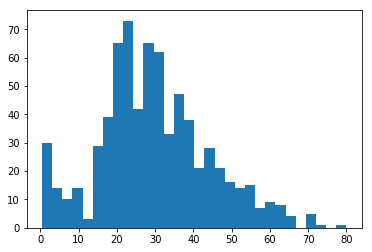

In [40]:
plt.hist(X['Age'], bins=30)

### Train a classifer for Age and use it to fill gaps

So first we split the train.csv into 2 parts (one with non null age and the other with null) . We train a regressor on the non null data points to predict age and use this trained regressor to fill the missing ages. Now we combine the 2 split data sets into a single dataset and train a logistic regression classifier.

In [76]:
X = pd.read_csv('train.csv')
age_present = X['Age'] > 0

In [77]:
age_present.describe()

count      891
unique       2
top       True
freq       714
Name: Age, dtype: object

In [47]:
False in age_present

True

In [78]:
X_age_p = X[age_present]

In [79]:
X_age_p.shape

(714, 12)

In [80]:
age = X_age_p['Age']

# X_age_p

X_age_p = customVectorizer(X_age_p, ['Embarked', 'Age', 'PassengerId', 'Name', 'Ticket', 'Cabin'])
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_age_p, age)


X_null_age = X[X['Age'].isnull()]

pred_age = reg.predict(customVectorizer(X_null_age, ['Embarked', 'Age', 'PassengerId', 'Name', 'Ticket', 'Cabin']))

/home/bhishma/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/home/bhishma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/bhishma/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [82]:
age.mean()

29.69911764705882

In [83]:
pred_age = list(map(lambda x : max(0, x), pred_age))

In [84]:
X_null_age['Age'] = pred_age

/home/bhishma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
y = X['Survived']

In [92]:
# from sklearn.model_selection import cross_val_score
# lr_model = LogisticRegression()

X_age_p['Age'] = age

In [97]:
X_age_p.shape

(714, 7)

In [98]:
X = pd.concat([X_age_p, customVectorizer(X_null_age, ['Embarked', 'PassengerId', 'Name', 'Ticket', 'Cabin'])])

/home/bhishma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [103]:
y = X['Survived']
X = X.drop(labels=['Survived'], axis=1)

In [107]:
lr_model = LogisticRegression()
cv_scores = cross_val_score(lr_model, X=X, y=y, cv=10, n_jobs=4)
print(cv_scores)

[0.76666667 0.76666667 0.85393258 0.7752809  0.80898876 0.78651685
 0.79775281 0.80898876 0.86516854 0.79545455]


### Try ensemble with LR, SVC, RF

In [114]:
# taken from https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=42)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model

ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())
print(results)


/home/bhishma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bhishma/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/bhishma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bhishma/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' t

0.8216604244694132
[0.72222222 0.76404494 0.78651685 0.80898876 0.80898876 0.79775281
 0.86516854 0.85393258 0.8988764  0.91011236]


/home/bhishma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bhishma/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/bhishma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bhishma/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' t